In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
df=pd.read_csv("C:/Users/aksha/Downloads/breastCancer.csv")

In [201]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [202]:
df.shape

(699, 11)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [204]:
#Data Preprocessing

In [205]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [206]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [207]:
df["bare_nucleoli"]

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [208]:
df[df["bare_nucleoli"]=="?"]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [209]:
isdigits_in_BN=pd.DataFrame(df.bare_nucleoli.str.isdigit())    #isdigit() method returns true if all the character are digits otherwise it returns False.
isdigits_in_BN.sum()

bare_nucleoli    683
dtype: int64

In [210]:
df1=df.replace("?",np.nan)

In [211]:
df2=df1.fillna(df1.median())

In [212]:
df2.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [213]:
df2['bare_nucleoli'] = df2['bare_nucleoli'].astype('int64')

In [214]:
df2.drop('id',axis=1,inplace=True)

In [215]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


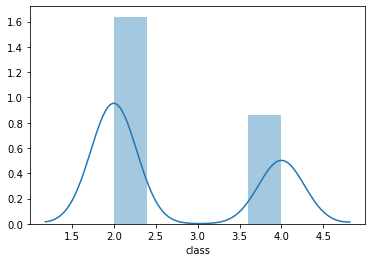

In [216]:
sns.distplot(df2['class'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C55D95490>,
      dtype=object)

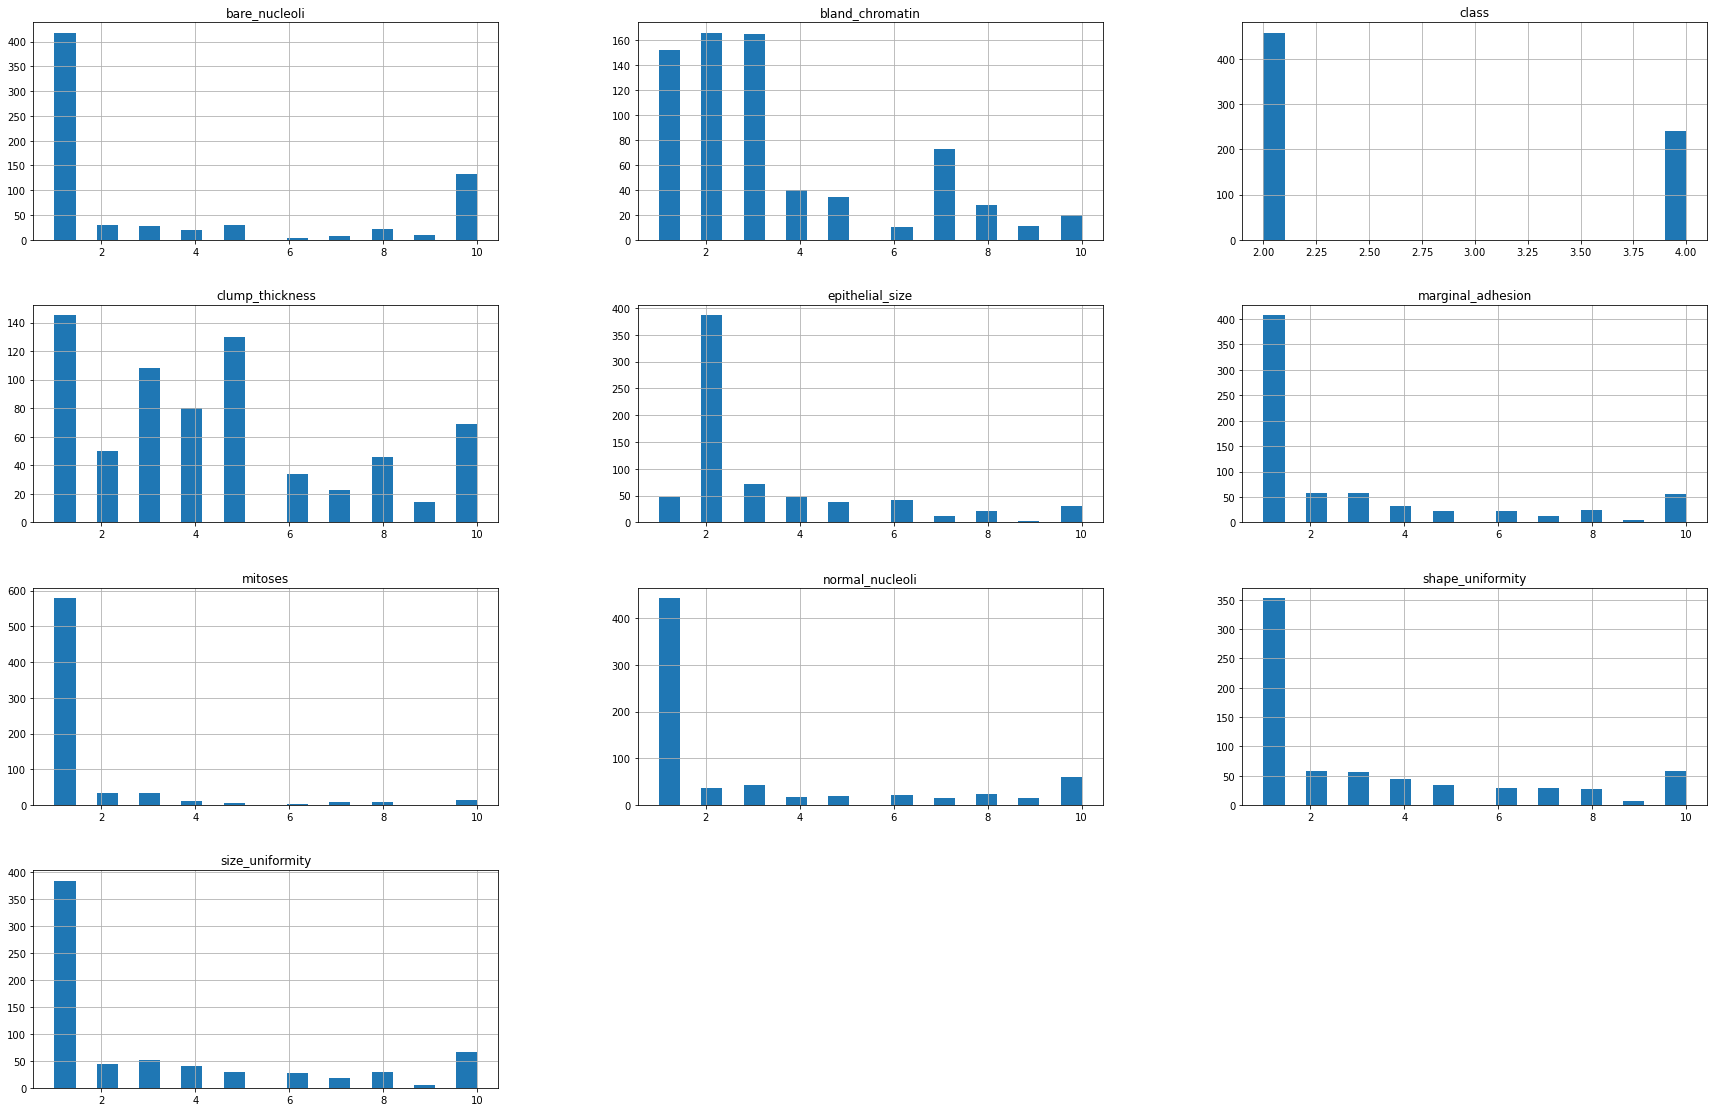

In [217]:
df2.hist(bins=20,figsize=(30,30),layout=(6,3))

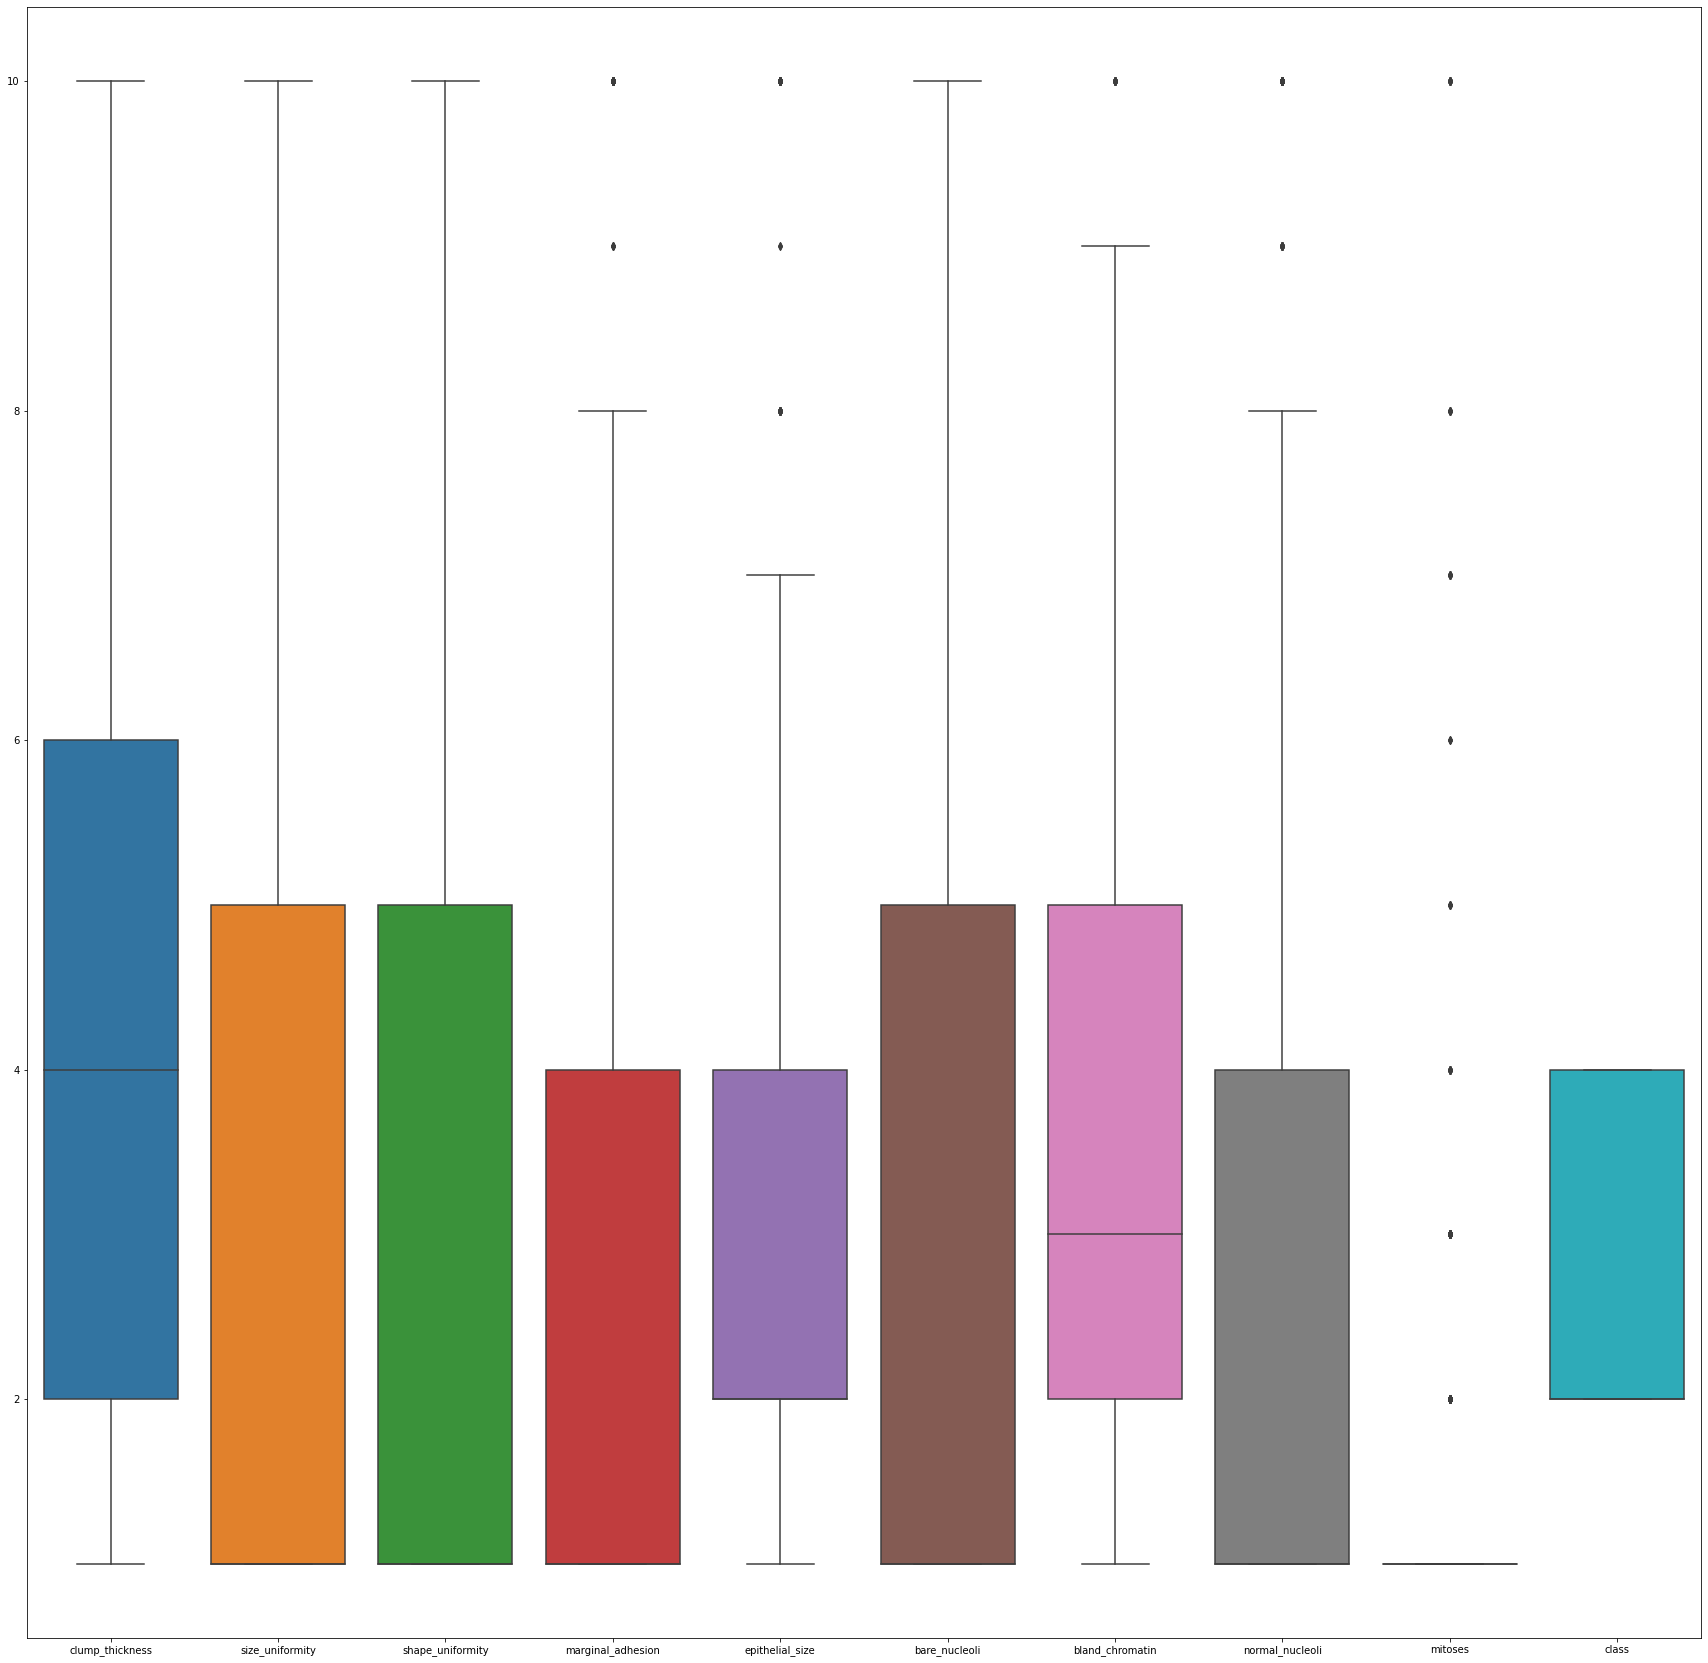

In [218]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df2)

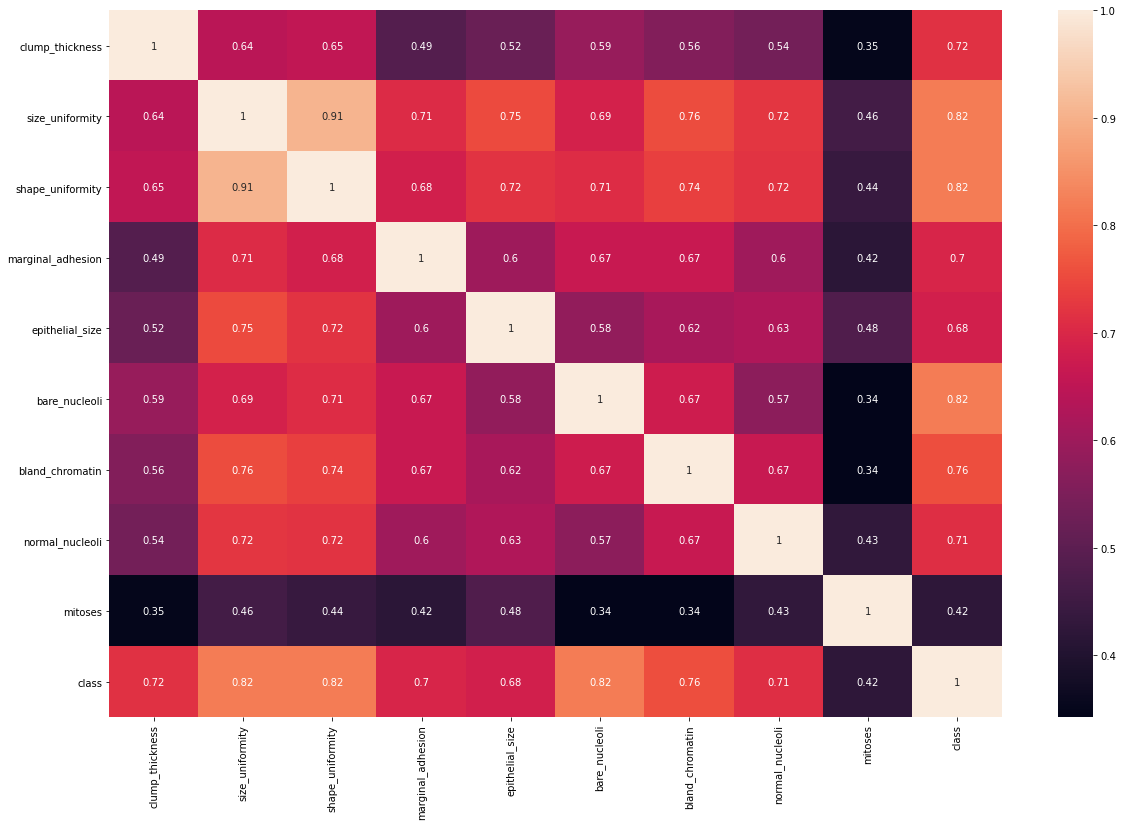

In [219]:
plt.figure(figsize=(20,13))
sns.heatmap(df2.corr(),annot=True)

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


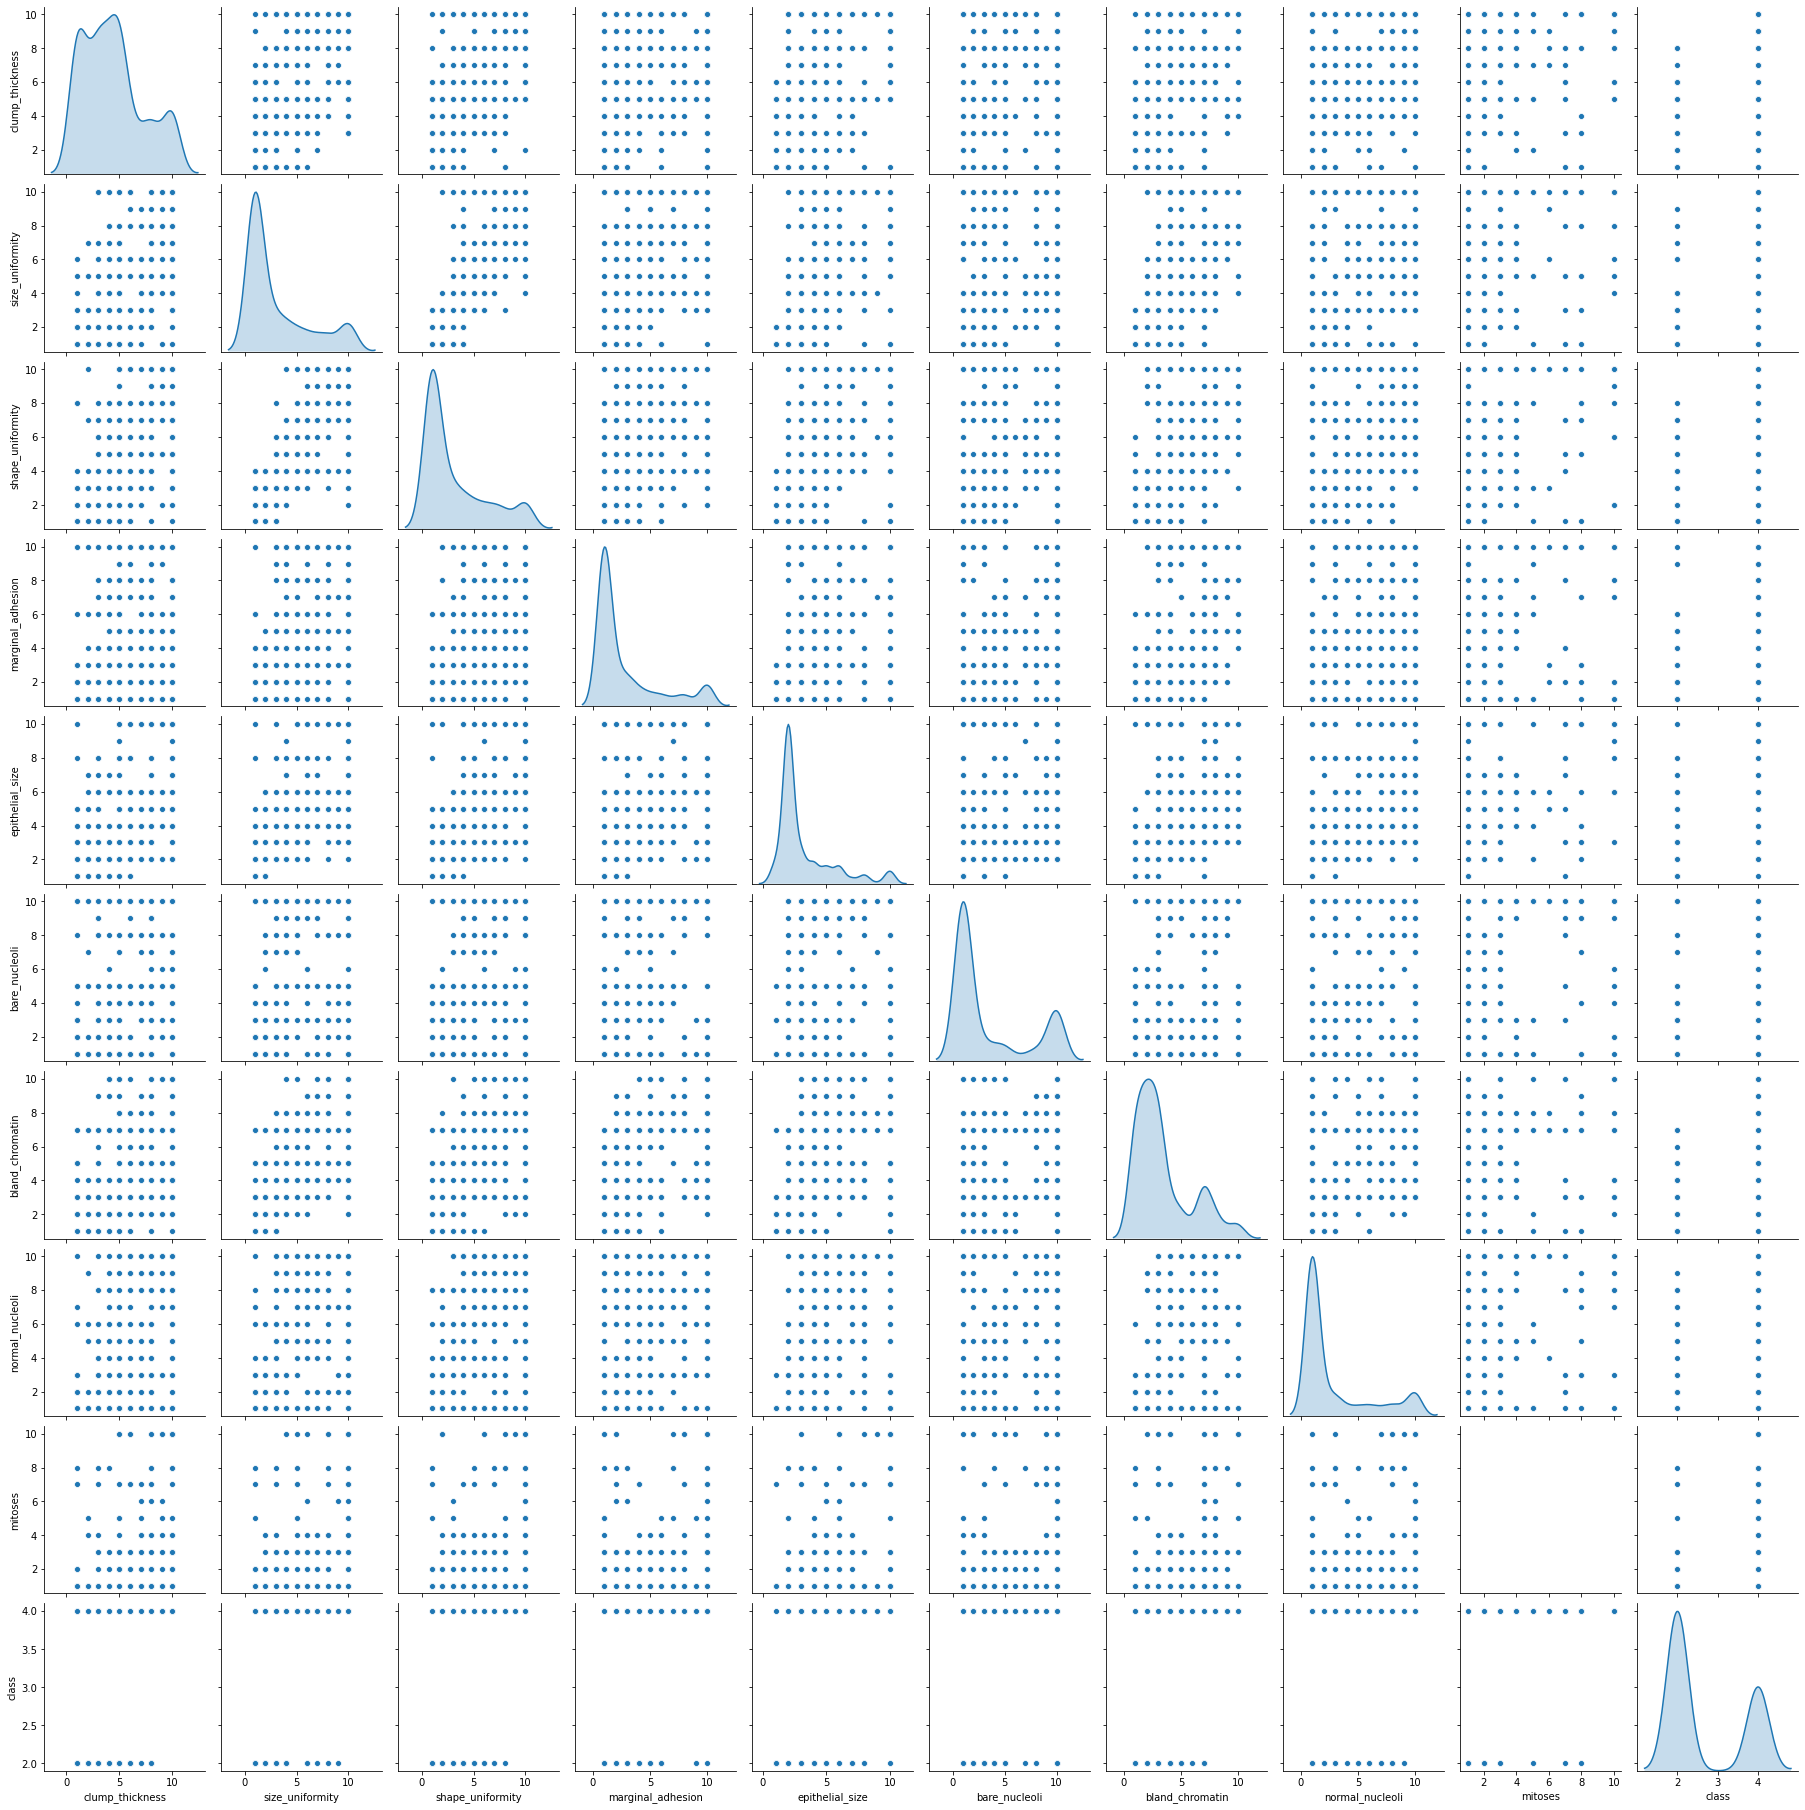

In [185]:
sns.pairplot(df2,diag_kind="kde")

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x=df2.drop("class",axis=1)
y=df2["class"]

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [231]:
from sklearn.neighbors import KNeighborsClassifier

In [232]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [233]:
knn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [234]:
pred=knn.predict(x_test)

In [235]:
from scipy.stats import zscore

In [236]:
print("KNN Classifier is predicting at:",knn.score(x_test,y_test)*100)

KNN Classifier is predicting at: 95.71428571428572


In [228]:
from sklearn.svm import SVC

In [229]:
svc=SVC(gamma=0.025,C=3)
svc.fit(x_train,y_train)

SVC(C=3, gamma=0.025)

In [230]:
pred1=svc.predict(x_test)

In [226]:
svc.score(x_test,pred1)

1.0

In [241]:
knnpred=pd.DataFrame(pred)
svcpred=pd.DataFrame(pred1)
dfPred=pd.concat([knnpred,svcpred],axis=1)

In [243]:
dfPred.columns=[['knnPredictions','svcPredictions']]

In [247]:
from sklearn.metrics import confusion_matrix,classification_report

In [248]:
print("classification_report for KNN")

print("..."*10)

print(classification_report(y_test, pred))

classification_report for KNN
..............................
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       142
           4       0.93      0.94      0.93        68

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [249]:
print("classification_report for SVC")

print("..."*10)

print(classification_report(y_test, pred1))

classification_report for SVC
..............................
              precision    recall  f1-score   support

           2       0.97      0.94      0.96       142
           4       0.89      0.94      0.91        68

    accuracy                           0.94       210
   macro avg       0.93      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



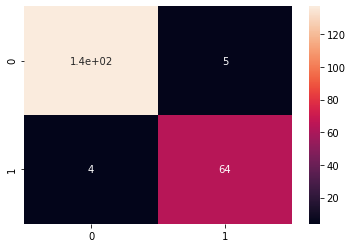

In [252]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

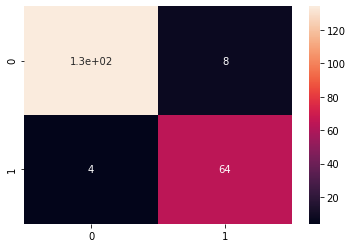

In [253]:
cm1=confusion_matrix(y_test,pred1)
sns.heatmap(cm1,annot=True)